In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathlib import Path
from glob import glob
from astropy.time import Time

import pandas as pd
import xarray as xa
import seaborn as sb


In [3]:
%run src/kelt1.py

In [7]:
rfiles = sorted(glob('kelt-1-v*'))

results = []

for rf in rfiles:
    ds = xa.load_dataset(rf)
    df = pd.DataFrame(ds.mcmc_samples.data.reshape([-1, ds.parameter.size]), columns=ds.parameter)
    results.append(df)

In [8]:
times, _, _  = read_data()
times = Time([t.mean() for t in times], format='jd')

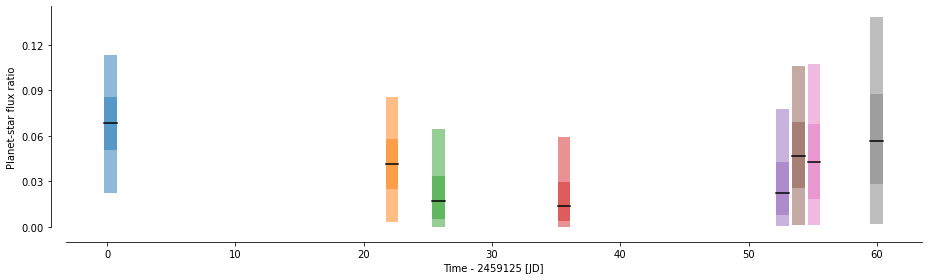

In [54]:
fig, ax = subplots(figsize=(13,4))
tref = floor(min(times.value))
width = 1.0
hw = 0.5*width
for i,r in enumerate(results):
    p = percentile(r.fr_cheops, [50, 16, 84, 0.5, 99.5])
    ax.bar(times[i].value - tref, p[4]-p[3], width, p[3], fc=f"C{i}", alpha=0.5)
    ax.bar(times[i].value - tref, p[2]-p[1], width, p[1], fc=f"C{i}", alpha=0.5)
    ax.plot([times[i].value-tref-hw,times[i].value-tref+hw], [p[0], p[0]], 'k')
    
setp(ax, xlabel=f"Time - {tref:.0f} [JD]", ylabel='Planet-star flux ratio', yticks=linspace(0, 0.12, 5))
sb.despine(fig, offset=15)
fig.tight_layout()
fig.savefig('kelt-1-fratio-evolution.png')

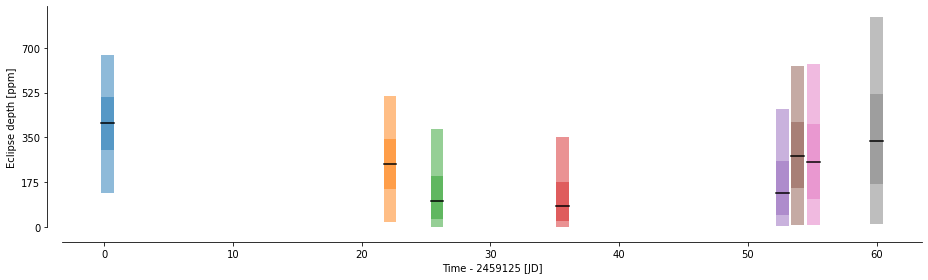

In [53]:
fig, ax = subplots(figsize=(13,4))
tref = floor(min(times.value))
width = 1.0
hw = 0.5*width
for i,r in enumerate(results):
    p = percentile(1e6 * r.fr_cheops * r.k2, [50, 16, 84, 0.5, 99.5])
    ax.bar(times[i].value - tref, p[4]-p[3], width, p[3], fc=f"C{i}", alpha=0.5)
    ax.bar(times[i].value - tref, p[2]-p[1], width, p[1], fc=f"C{i}", alpha=0.5)
    ax.plot([times[i].value-tref-hw,times[i].value-tref+hw], [p[0], p[0]], 'k')
setp(ax, xlabel=f"Time - {tref:.0f} [JD]", ylabel='Eclipse depth [ppm]', yticks=linspace(0, 700, 5))
sb.despine(fig, offset=15)
fig.tight_layout()
fig.savefig('kelt-1-depth-evolution.png')

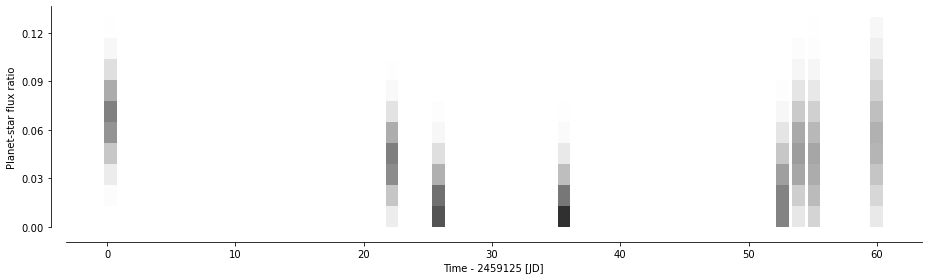

In [52]:
fig, ax = subplots(figsize=(13,4))
tref = floor(min(times.value))
width = 1.0
for j,r in enumerate(results):
    values, edges = histogram(r.fr_cheops, range=(0, 0.13), density=True)
    for i in range(values.size):
        ax.bar(times[j].value - tref, edges[i+1]-edges[i], width, edges[i], fc=f"{1 - min(1., values[i]/45)}")
setp(ax, xlabel=f"Time - {tref:.0f} [JD]", ylabel='Planet-star flux ratio', yticks=linspace(0, 0.12, 5))
sb.despine(fig, offset=15)
fig.tight_layout()
fig.savefig('kelt-1-fratio-dist-evolution.png')

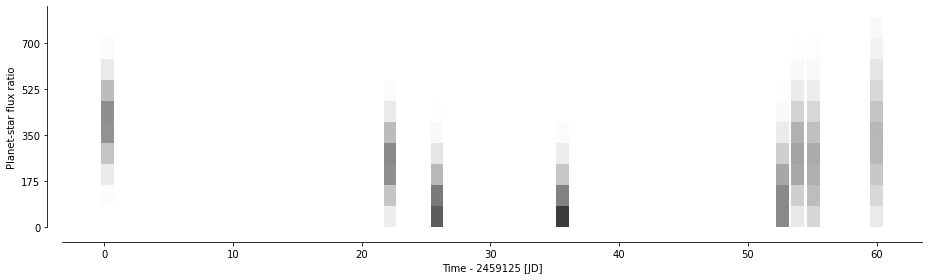

In [51]:
fig, ax = subplots(figsize=(13,4))
tref = floor(min(times.value))
width = 1.0
for j,r in enumerate(results):
    values, edges = histogram(1e6 * r.fr_cheops * r.k2, range=(0,800), density=True)
    for i in range(values.size):
        ax.bar(times[j].value - tref, edges[i+1]-edges[i], width, edges[i], fc=f"{1 - min(1., values[i]/0.008)}")
setp(ax, xlabel=f"Time - {tref:.0f} [JD]", ylabel='Planet-star flux ratio', yticks=linspace(0, 700, 5))
sb.despine(fig, offset=15)
fig.tight_layout()
fig.savefig('kelt-1-depth-dist-evolution.png')